In [2]:
import desitarget 
from desitarget.targets import desi_mask, bgs_mask, mws_mask

from astropy.table import Table
from astropy.io import fits
from astropy.cosmology import FlatLambdaCDM
import astropy.units as U

import numpy as np
import matplotlib.pyplot as plt
import glob
import os

In [3]:
N = Table.read('/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_BRIGHT_N_clustering.dat.fits')
S = Table.read('/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_BRIGHT_S_clustering.dat.fits')

In [4]:
data = Table(np.hstack((N,S))) #BGS ANY in N, S combined

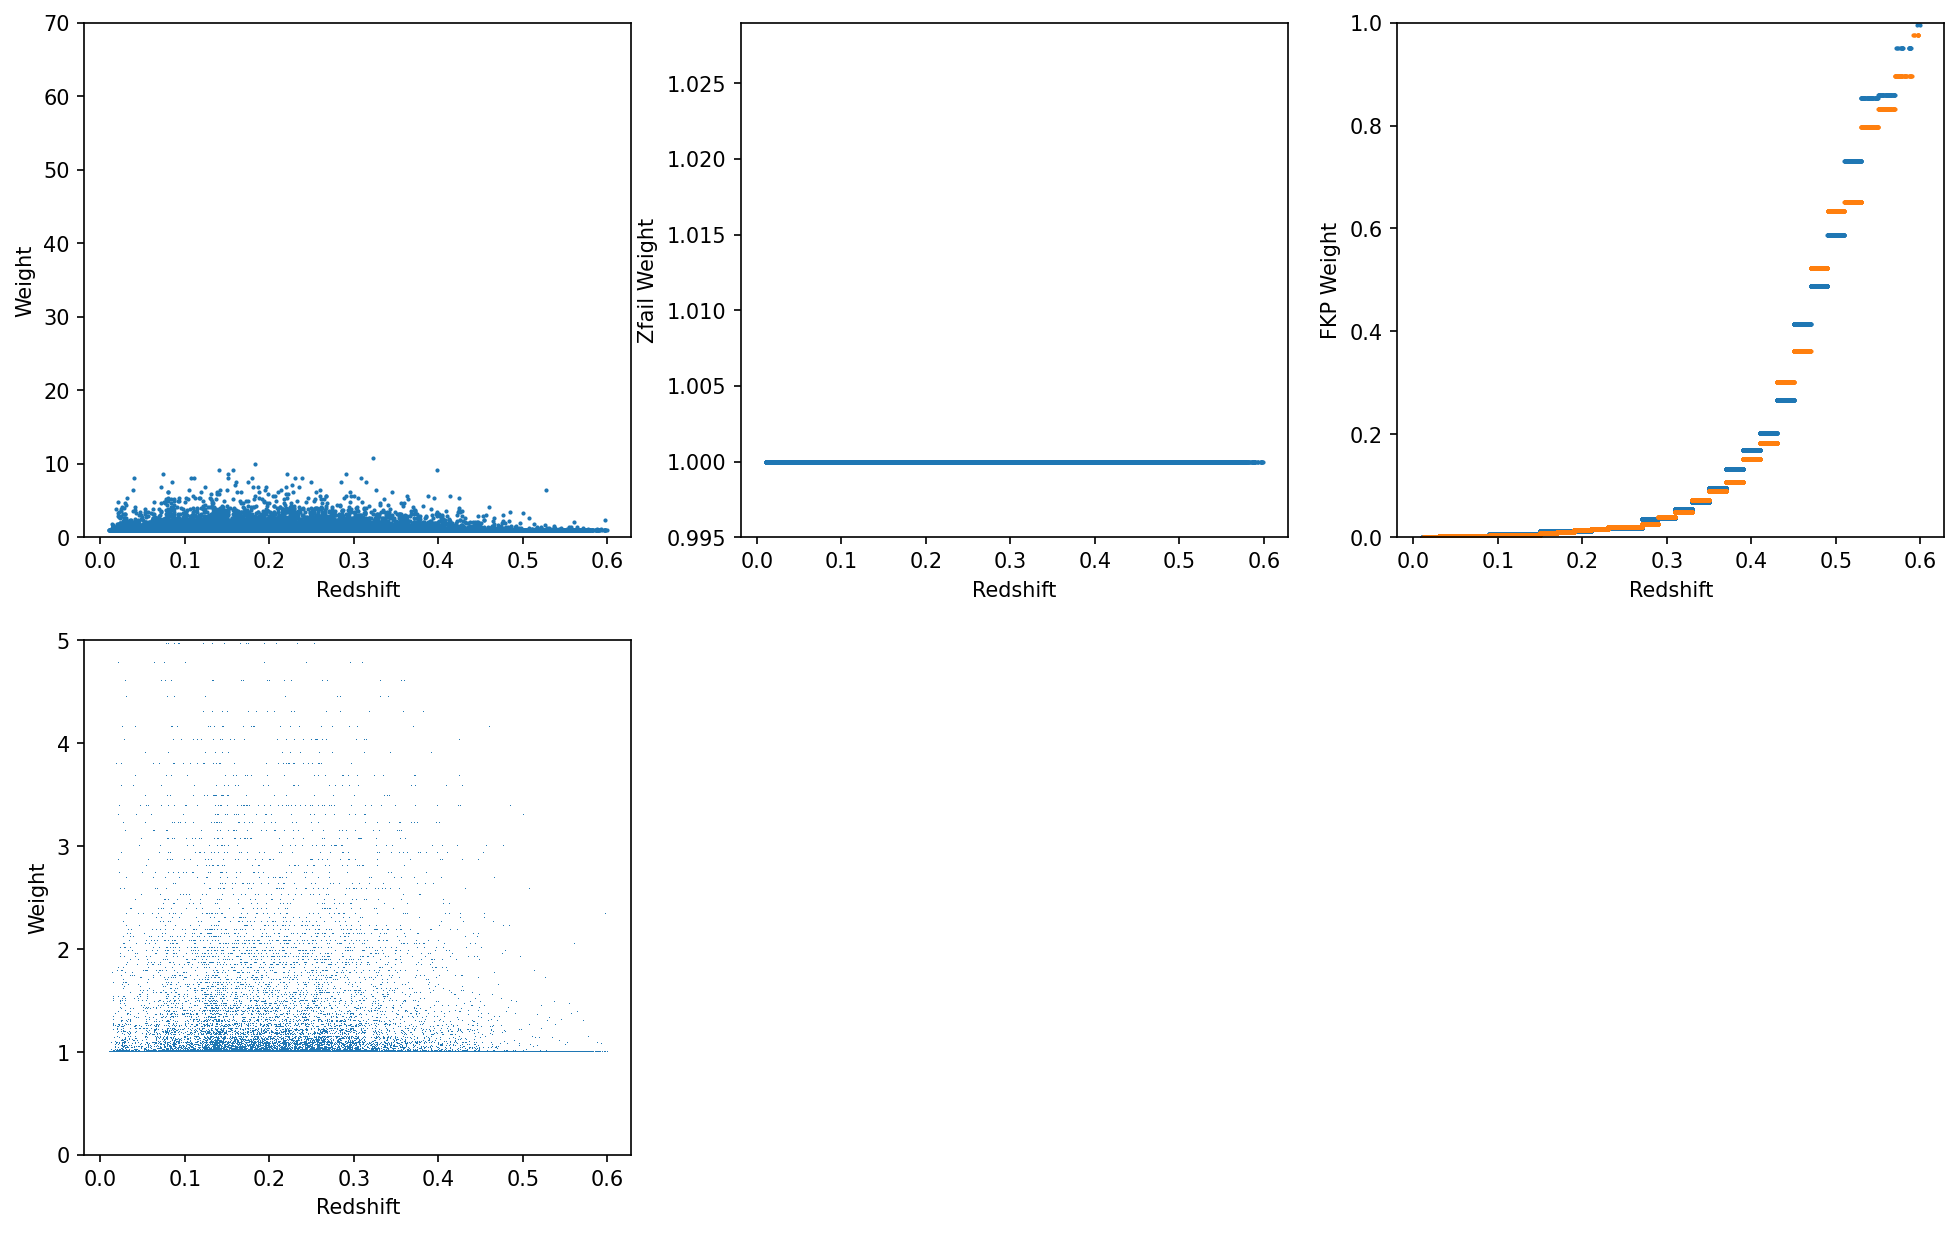

In [5]:
plt.figure(figsize=(16,10),dpi=150)
ax1 = plt.subplot(231)
ax1.plot(data['Z'], data['WEIGHT'], lw=0, marker='o', markersize=1)
plt.xlabel('Redshift')
plt.ylabel('Weight')
plt.ylim(0,70)

ax4 = plt.subplot(234)
ax4.plot(data['Z'], data['WEIGHT'], lw=0, marker=',')
plt.xlabel('Redshift')
plt.ylabel('Weight')
plt.ylim(0,5)

ax2 = plt.subplot(232)
ax2.plot(data['Z'], data['WEIGHT_ZFAIL'], lw=0, marker='o', markersize=1)
plt.xlabel('Redshift')
plt.ylabel('Zfail Weight')
plt.ylim(0.995,1.029)

ax3 = plt.subplot(233)
ax3.plot(N['Z'], N['WEIGHT_FKP'], lw=0, marker='o', markersize=1)
ax3.plot(S['Z'], S['WEIGHT_FKP'], lw=0, marker='o', markersize=1)
plt.xlabel('Redshift')
plt.ylabel('FKP Weight')
plt.ylim(0,1)

plt.savefig('../figures/week8-9/sv3_bright_weights.png')

#https://desi.lbl.gov/trac/wiki/ClusteringWG/LSScat/SV3/current_version
#WEIGHT = 129/(128*PROB_OBS + 1)
#There is one object which has zero probobs

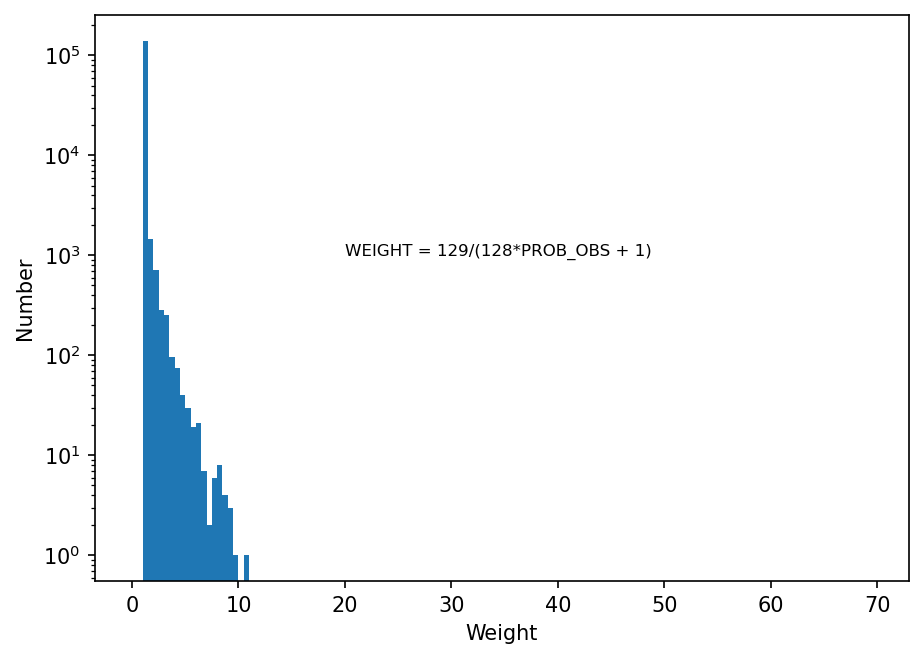

In [6]:
fig, ax = plt.subplots(figsize=(7,5), dpi=150)
ax.hist(data['WEIGHT'], np.arange(0,70,0.5))
ax.set_yscale('log')
plt.xlabel('Weight')
plt.ylabel('Number')
plt.text(20,1000,'WEIGHT = 129/(128*PROB_OBS + 1)', size=8)
plt.savefig('../figures/week8-9/sv3_bright_weight_hist.png')